<a href="https://colab.research.google.com/github/5hyeona/mining/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_2113899.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#주제 : 허리둘레, 음주여부, 흡연상태, 총콜레스테롤, ldl콜레스테롤이 체중에 미치는 영향



In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
data = pd.read_csv("/content/health_data.csv")

In [5]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import mglearn

In [8]:
df=data.copy()
print(df.shape)

(10000, 31)


In [9]:
display(df.head)
print(df.info())
print(df.describe())

<bound method NDFrame.head of       기준년도  가입자일련번호  시도코드 성별코드  연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
0     2020        1    36    M            9        165          60   72.1   
1     2020        2    27    F           13        150          65   81.0   
2     2020        3    11    F           12        155          55   70.0   
3     2020        4    31    M           13        160          70   90.8   
4     2020        5    41    F           12        155          50   75.2   
...    ...      ...   ...  ...          ...        ...         ...    ...   
9995  2020     9996    44    F           13        155          55   83.0   
9996  2020     9997    43    F           11        160          55   77.5   
9997  2020     9998    45    M           12        160          80   93.0   
9998  2020     9999    27    F           15        155          55   78.0   
9999  2020    10000    45    F           13        160          75  100.0   

      시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [10]:
df.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


In [11]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [12]:
df.info()

df_1= df.drop(['기준년도','가입자일련번호','구강검진수검여부','데이터공개일자'],axis=1)

df_1 = df_1.dropna(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시도코드         1249 non-null   int64  
 1   성별코드         1249 non-null   object 
 2   연령대코드(5세단위)  1249 non-null   int64  
 3   신장(5Cm단위)    1249 non-null   int64  
 4   체중(5Kg 단위)   1249 non-null   int64  
 5   허리둘레         1249 non-null   float64
 6   시력(좌)        1249 non-null   float64
 7   시력(우)        1249 non-null   float64
 8   청력(좌)        1249 non-null   int64  
 9   청력(우)        1249 non-null   int64  
 10  수축기혈압        1249 non-null   float64
 11  이완기혈압        1249 non-null   float64
 12  식전혈당(공복혈당)   1249 non-null   float64
 13  총콜레스테롤       1249 non-null   float64
 14  트리글리세라이드     1249 non-null   float64
 15  HDL콜레스테롤     1249 non-null   float64
 16  LDL콜레스테롤     1249 non-null   float64
 17  혈색소          1249 non-null   float64
 18  요단백          1249 non-null   float64
 19  혈청크레아티

In [22]:
df_1['obesity'] = df_1['신장(5Cm단위)']- df_1['체중(5Kg 단위)']

In [23]:
df_1.head()

,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석,obesity,body
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,0.7,18.0,20.0,35.0,Yes,Yes,0.0,1.0,85,Fat
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,29.0,54.0,24.0,No,Yes,0.0,1.0,95,Fat
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,0.8,24.0,14.0,12.0,No,No,0.0,0.0,105,Fat
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.4,33.0,22.0,29.0,No,Yes,0.0,0.0,95,Fat
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,28.0,20.0,43.0,No,Yes,0.0,0.0,100,Fat


In [24]:
# 과체중. 비만 -> Fat
# 저체중, 정상 -> NotFat
body = []
for row in df_1['obesity'] : 
  if row <= 90:
    body.append('Fat')
  else:
    body.append('NotFat')

df_1['body'] = body

In [25]:
df_1.head()

,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석,obesity,body
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,0.7,18.0,20.0,35.0,Yes,Yes,0.0,1.0,85,Fat
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,29.0,54.0,24.0,No,Yes,0.0,1.0,95,NotFat
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,0.8,24.0,14.0,12.0,No,No,0.0,0.0,105,NotFat
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.4,33.0,22.0,29.0,No,Yes,0.0,0.0,95,NotFat
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,28.0,20.0,43.0,No,Yes,0.0,0.0,100,NotFat


In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시도코드         1249 non-null   int64  
 1   성별코드         1249 non-null   object 
 2   연령대코드(5세단위)  1249 non-null   int64  
 3   신장(5Cm단위)    1249 non-null   int64  
 4   체중(5Kg 단위)   1249 non-null   int64  
 5   허리둘레         1249 non-null   float64
 6   시력(좌)        1249 non-null   float64
 7   시력(우)        1249 non-null   float64
 8   청력(좌)        1249 non-null   int64  
 9   청력(우)        1249 non-null   int64  
 10  수축기혈압        1249 non-null   float64
 11  이완기혈압        1249 non-null   float64
 12  식전혈당(공복혈당)   1249 non-null   float64
 13  총콜레스테롤       1249 non-null   float64
 14  트리글리세라이드     1249 non-null   float64
 15  HDL콜레스테롤     1249 non-null   float64
 16  LDL콜레스테롤     1249 non-null   float64
 17  혈색소          1249 non-null   float64
 18  요단백          1249 non-null   float64
 19  혈청크레아티

In [27]:
df_2 = df_1.drop(['obesity'], axis=1)

In [28]:
df_2

,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석,body
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,1.0,0.7,18.0,20.0,35.0,Yes,Yes,0.0,1.0,Fat
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,1.0,29.0,54.0,24.0,No,Yes,0.0,1.0,NotFat
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,1.0,0.8,24.0,14.0,12.0,No,No,0.0,0.0,NotFat
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.0,1.4,33.0,22.0,29.0,No,Yes,0.0,0.0,NotFat
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,1.0,28.0,20.0,43.0,No,Yes,0.0,0.0,NotFat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,30,M,9,180,70,87.5,1.2,0.9,1,1,...,1.0,0.9,22.0,21.0,19.0,No,Yes,0.0,1.0,NotFat
9963,41,F,13,160,75,107.4,0.8,0.8,1,1,...,1.0,0.8,20.0,15.0,14.0,No,Yes,1.0,1.0,Fat
9965,45,F,12,155,60,80.0,1.5,1.0,1,1,...,1.0,0.6,22.0,9.0,29.0,No,No,0.0,0.0,NotFat
9967,11,M,12,170,80,90.0,0.9,0.9,1,1,...,1.0,0.7,27.0,36.0,66.0,NotNow,Yes,0.0,2.0,Fat


1    952
0    297
Name: body, dtype: int64


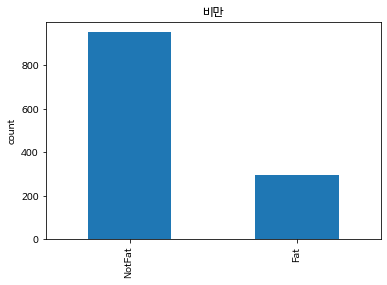

In [36]:
print(df_1['body'].value_counts())
df_2['body'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('비만')
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
#문자형 변수 추출
s = (df_1.dtypes == 'object')
object_cols = list(s[s].index)

print("문자형인 변수가 있는 컬럼:", object_cols)

문자형인 변수가 있는 컬럼: []


In [38]:
LE=LabelEncoder()

for i in object_cols:
    df_1[i]=df_1[[i]].apply(LE.fit_transform)
    
print("모든 변수가 숫자형입니다!")

모든 변수가 숫자형입니다!


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [40]:
X = df_2.drop(['body'], axis = 1)  # 27개 변수 
y = df_2['body']

In [50]:
from sklearn.preprocessing import LabelEncoder
#문자형 변수 추출
s = (df_2.dtypes == 'object')
object_cols = list(s[s].index)

print("문자형인 변수가 있는 컬럼:", object_cols)

문자형인 변수가 있는 컬럼: ['성별코드', '흡연상태', '음주여부', 'body']


In [55]:
LE=LabelEncoder()

for i in object_cols:
    df_2[i]=df_2[[i]].apply(LE.fit_transform)
    
print("모든 변수가 숫자형입니다!")

모든 변수가 숫자형입니다!


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [57]:
X = df_2.drop(['body'], axis = 1)  # 27개 변수 
y = df_2['body']

In [58]:
X

,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석
6,44,1,9,165,80,93.0,0.8,0.7,1,2,...,15.7,1.0,0.7,18.0,20.0,35.0,2,1,0.0,1.0
16,30,1,11,160,65,90.0,0.6,0.6,1,1,...,16.6,1.0,1.0,29.0,54.0,24.0,0,1,0.0,1.0
21,41,0,11,155,50,65.9,0.7,1.0,1,1,...,11.8,1.0,0.8,24.0,14.0,12.0,0,0,0.0,0.0
27,11,1,17,155,60,82.0,0.5,0.7,1,1,...,14.3,1.0,1.4,33.0,22.0,29.0,0,1,0.0,0.0
47,26,1,16,165,65,94.0,1.5,0.6,2,2,...,16.3,1.0,1.0,28.0,20.0,43.0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,30,1,9,180,70,87.5,1.2,0.9,1,1,...,15.1,1.0,0.9,22.0,21.0,19.0,0,1,0.0,1.0
9963,41,0,13,160,75,107.4,0.8,0.8,1,1,...,14.0,1.0,0.8,20.0,15.0,14.0,0,1,1.0,1.0
9965,45,0,12,155,60,80.0,1.5,1.0,1,1,...,13.8,1.0,0.6,22.0,9.0,29.0,0,0,0.0,0.0
9967,11,1,12,170,80,90.0,0.9,0.9,1,1,...,15.0,1.0,0.7,27.0,36.0,66.0,1,1,0.0,2.0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.907


In [60]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.920
시험용 데이터 정확도: 0.888


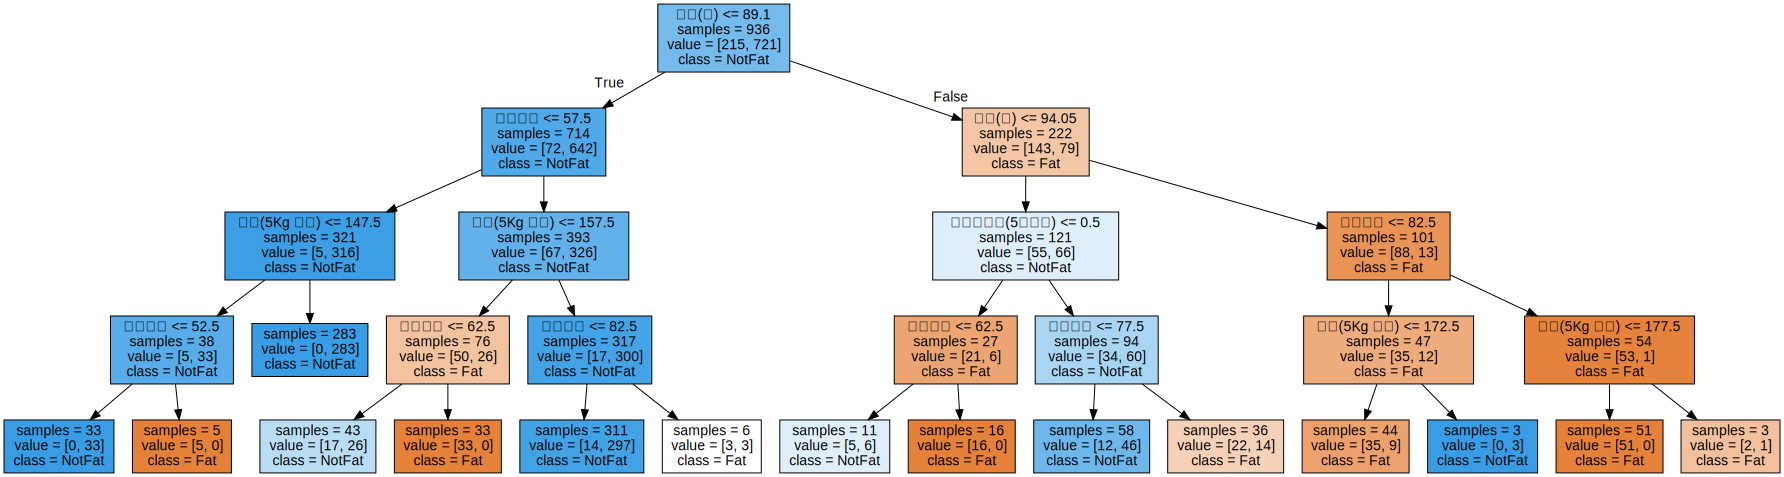

In [61]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "Fat", "NotFat"],
                feature_names=df_2.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [62]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.03246797 0.         0.22403437 0.21105599 0.53244168
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


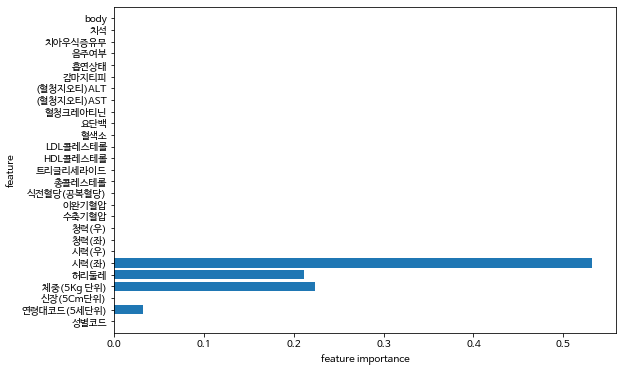

In [63]:
import numpy as np

def plot_feature_importances_df(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df_2.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df_2.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_df(tree)

In [64]:
X_train[['시력(좌)','체중(5Kg 단위)']]
y_train

7733    0
4559    0
3212    1
7118    0
3559    1
       ..
8470    1
8838    0
9121    0
7013    1
9077    1
Name: body, Length: 936, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


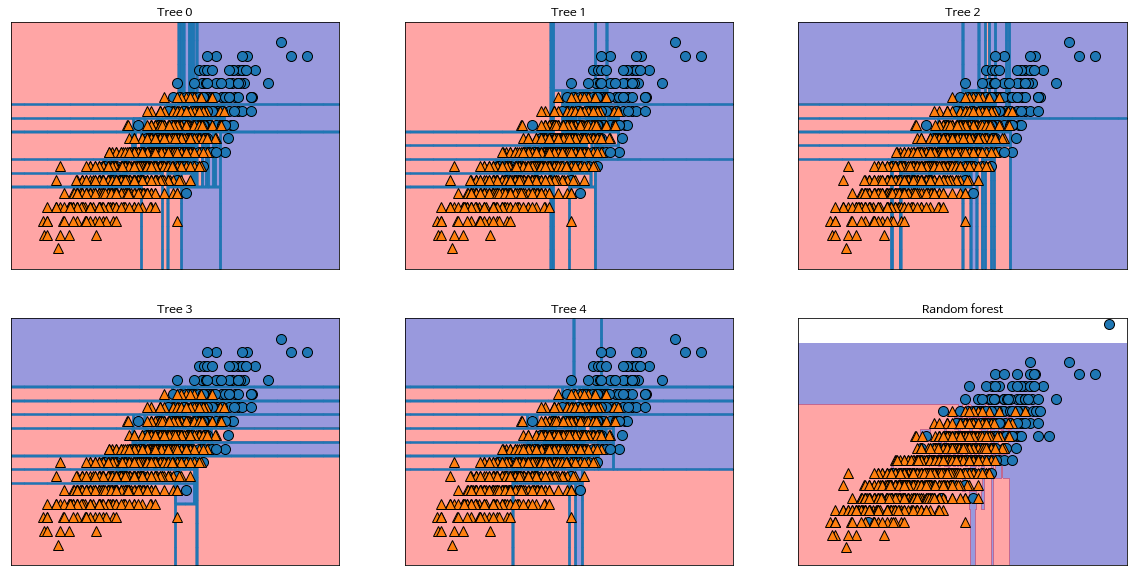

In [65]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train[['허리둘레','체중(5Kg 단위)']], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train[['허리둘레','체중(5Kg 단위)']].values, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train[['허리둘레','체중(5Kg 단위)']].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X['허리둘레'], X['체중(5Kg 단위)'], y)
plt.show()

In [66]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.869


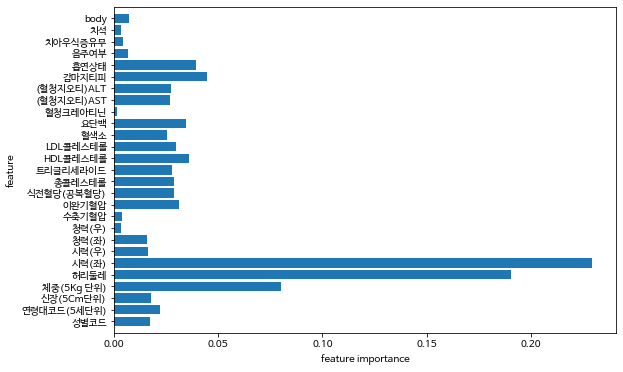

In [67]:
plot_feature_importances_df(forest)

In [68]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.81914894 0.74468085 0.91489362 0.77659574 0.74468085 0.78723404
 0.78494624 0.78494624 0.75268817 0.75268817]
Random forest:  [0.88297872 0.89361702 0.88297872 0.91489362 0.89361702 0.91489362
 0.90322581 0.90322581 0.87096774 0.91397849]
Accuracy mean
Decision tree :0.786
Random forest :0.897


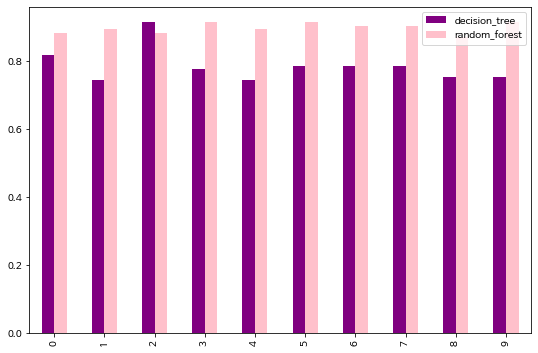

In [69]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))


df.plot(kind = 'bar', color = ['purple','pink'])

In [70]:
df

,decision_tree,random_forest
0,0.819149,0.882979
1,0.744681,0.893617
2,0.914894,0.882979
3,0.776596,0.914894
4,0.744681,0.893617
5,0.787234,0.914894
6,0.784946,0.903226
7,0.784946,0.903226
8,0.752688,0.870968
9,0.752688,0.913978


#인사이트 도출
1. Decision tree의 정확도는 0.786, Random forest의 정확도는 0.897이므로 Random forest가 더 정확한 모델이다.
2. 중요변수는 시력(좌), 허리둘레, 체중이다.

